In [1]:
import pandas as pd
from readability import Readability
import seaborn as sns
import matplotlib.pyplot as plt

## using "raw" sheet from here:
https://docs.google.com/spreadsheets/d/1OxmGGNCukekctqMA0CKZ2scrwpo_WZjb2MD1bomIm9o/

download it as tab separated value

## and Readability package from here:

https://github.com/cdimascio/py-readability-metrics

In [2]:
textdf = pd.read_csv("./Text Leveler Training Data - raw.tsv", delimiter="\t")
textdf.shape

(249, 8)

In [3]:
textdf['lexile_score'] = textdf['lexile_score'].apply(lambda x: int(x[:-1]))

In [4]:
textdf.head(2)

,file,grade,subject,output_text,lexile_score,word_count,mean_sentence_length,flesch_kincaid_score
0,T1 Matter L1 Properties of Matter O.pdf,EL_G4,Science,Properties of Matter Matter is anything that ...,810,503,11.43,5.4
1,T1 Matter L2 States of Matter O.pdf,EL_G4,Science,States of Matter: Solids Scientists have lear...,810,489,12.54,4.6


## to observe the values of a single passage

In [5]:
def print_readability_metric(metric_func, metric_name):
    try:
        result1 = metric_func()
        print(f"{metric_name}: {result1.score}")
    except Exception as e:
        print(f"ERROR in {metric_name}: {e}")

In [6]:
rindx = 83
print (textdf['output_text'][rindx])

Sensory Organs and Nervous System  Organs are body parts that perform a specific function. An organ system is a group of organs that work together to perform a particular job. Organ systems interact to keep an organism, or a living thing, alive.  The human nervous system is an organ system that sends messages throughout the body. Nerves carry messages to and from the brain to all parts of the body through the spinal cord. Sensory organs are organs through which your body connects to the world. The sensory organs are your eyes, ears, tongue, nose, and skin. Each sensory organ gathers specific kinds of information. The information is sent to your brain. Your brain is the control center of the body. It interprets the information it receives. Then it sends messages telling the body how to respond, or react.  Your largest organ is your skin. It not only collects sensory information but it also covers and protects your internal organs. In addition, your skin protects your body from disease-c

In [7]:
text = textdf['output_text'][rindx]
r = Readability(text)

print_readability_metric(r.flesch_kincaid, "Flesch-Kincaid")
print_readability_metric(r.flesch, "Flesch")
print_readability_metric(r.gunning_fog, "Gunning Fog")
print_readability_metric(r.coleman_liau, "Coleman-Liau")
print_readability_metric(r.dale_chall, "Dale-Chall")
print_readability_metric(r.ari, "ARI")
print_readability_metric(r.linsear_write, "Linsear Write")
print_readability_metric(r.smog, "SMOG")
print_readability_metric(r.spache, "Spache")

print ("===== FROM TSV =====")
print (f"grade : {textdf['grade'][rindx]}")
print (f"Flesch Kincaid : {textdf['flesch_kincaid_score'][rindx]}")
print (f"Lexile : {textdf['lexile_score'][rindx]}")

Flesch-Kincaid: 7.126394198443958
Flesch: 65.13128133704737
Gunning Fog: 7.960080683892037
Coleman-Liau: 9.128802228412255
Dale-Chall: 8.14303468446835
ARI: 6.643443473249448
Linsear Write: 6.362068965517241
SMOG: 9.2995712137729
Spache: 6.105931226587263
===== FROM TSV =====
grade : EL_G5
Flesch Kincaid : 5.8
Lexile : 860


## calculate all metrics for all rows

In [8]:
# Define a function to calculate readability metrics for a given text
def calculate_readability_metrics(text):
    # Check if the text is valid (not empty or None)
    if not text or not isinstance(text, str):
        print(f"Invalid text: {text}")
        return {
            'flesch_kincaid': None,
            'flesch': None,
            'gunning_fog': None,
            'coleman_liau': None,
            'dale_chall': None,
            'ari': None,
            'linsear_write': None,
            'smog': None,
            'spache': None
        }

    try:
        r = Readability(text)
    except Exception as e:
        print(f"ERROR creating Readability object for text: {e}")
        return {
            'flesch_kincaid': None,
            'flesch': None,
            'gunning_fog': None,
            'coleman_liau': None,
            'dale_chall': None,
            'ari': None,
            'linsear_write': None,
            'smog': None,
            'spache': None
        }

    metrics = {}

    # Define a function to safely compute readability metrics
    def get_metric(metric_func, metric_name):
        try:
            return metric_func().score
        except Exception as e:
            print(f"ERROR in {metric_name} for text: {e}")
            return None

    # Calculate each readability metric
    metrics['flesch_kincaid_NEW'] = get_metric(r.flesch_kincaid, "Flesch-Kincaid")
    metrics['flesch'] = get_metric(r.flesch, "Flesch")
    metrics['gunning_fog'] = get_metric(r.gunning_fog, "Gunning Fog")
    metrics['coleman_liau'] = get_metric(r.coleman_liau, "Coleman-Liau")
    metrics['dale_chall'] = get_metric(r.dale_chall, "Dale-Chall")
    metrics['ari'] = get_metric(r.ari, "ARI")
    metrics['linsear_write'] = get_metric(r.linsear_write, "Linsear Write")
    metrics['smog'] = get_metric(r.smog, "SMOG")
    metrics['spache'] = get_metric(r.spache, "Spache")

    return metrics

In [9]:
# Create new columns in the DataFrame for each readability metric
textdf['flesch_kincaid_NEW'] = None
textdf['flesch'] = None
textdf['gunning_fog'] = None
textdf['coleman_liau'] = None
textdf['dale_chall'] = None
textdf['ari'] = None
textdf['linsear_write'] = None
textdf['smog'] = None
textdf['spache'] = None

# Iterate over each row in the DataFrame and calculate readability metrics
for index, row in textdf.iterrows():
    text = row['output_text']
    metrics = calculate_readability_metrics(text)

    # Update the DataFrame with the calculated metrics
    for metric_name, value in metrics.items():
        textdf.at[index, metric_name] = value

ERROR in SMOG for text: SMOG requires 30 sentences. 28 found
ERROR in SMOG for text: SMOG requires 30 sentences. 28 found
ERROR in SMOG for text: SMOG requires 30 sentences. 17 found
ERROR in SMOG for text: SMOG requires 30 sentences. 15 found
ERROR in SMOG for text: SMOG requires 30 sentences. 23 found
ERROR in SMOG for text: SMOG requires 30 sentences. 28 found
ERROR in SMOG for text: SMOG requires 30 sentences. 22 found
ERROR in SMOG for text: SMOG requires 30 sentences. 27 found
ERROR in SMOG for text: SMOG requires 30 sentences. 21 found
ERROR in SMOG for text: SMOG requires 30 sentences. 28 found
ERROR in SMOG for text: SMOG requires 30 sentences. 26 found
ERROR in SMOG for text: SMOG requires 30 sentences. 27 found
ERROR in SMOG for text: SMOG requires 30 sentences. 26 found
ERROR in SMOG for text: SMOG requires 30 sentences. 29 found


In [10]:
textdf.head(3)

,file,grade,subject,output_text,lexile_score,word_count,mean_sentence_length,flesch_kincaid_score,flesch_kincaid_NEW,flesch,gunning_fog,coleman_liau,dale_chall,ari,linsear_write,smog,spache
0,T1 Matter L1 Properties of Matter O.pdf,EL_G4,Science,Properties of Matter Matter is anything that ...,810,503,11.43,5.4,6.137391,70.602281,8.230779,8.13503,7.122942,5.53241,5.875,9.029199,4.964206
1,T1 Matter L2 States of Matter O.pdf,EL_G4,Science,States of Matter: Solids Scientists have lear...,810,489,12.54,4.6,6.381265,70.7017,8.939554,7.101557,6.780947,5.065898,6.564103,10.20307,4.735685
2,T1 Matter L3 Measure Matter O.pdf,EL_G4,Science,Mass Anything that is made of matter and take...,860,470,13.43,5.0,5.980549,75.764887,8.502722,6.288785,8.0241,4.87949,7.014706,9.299571,5.571177


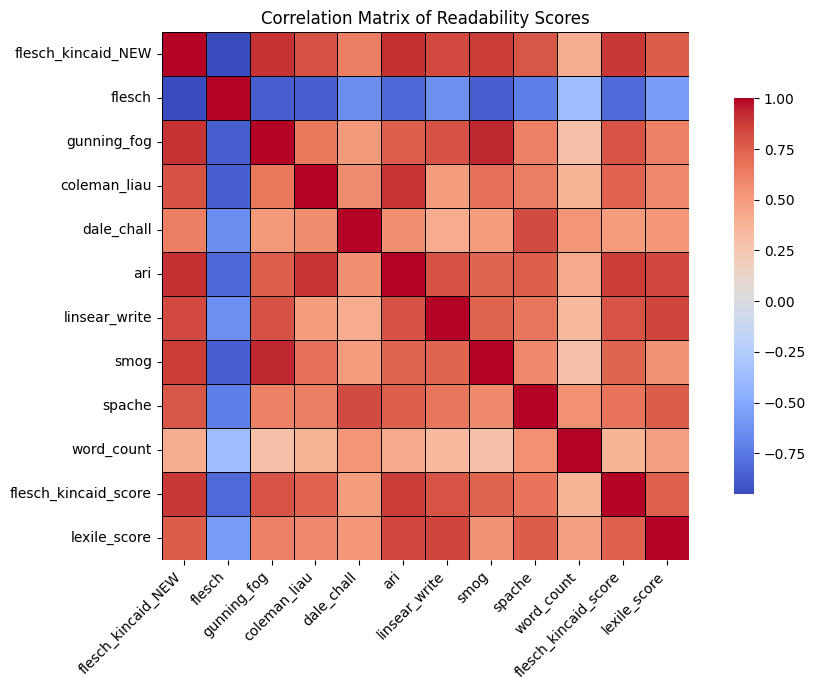

In [11]:
readability_columns = [
    'flesch_kincaid_NEW', 'flesch', 'gunning_fog', 'coleman_liau', 
    'dale_chall', 'ari', 'linsear_write', 'smog', 'spache', 'word_count', 'flesch_kincaid_score', 'lexile_score'
]

readability_df = textdf[readability_columns]

# Compute correlation matrix
correlation_matrix = readability_df.corr()

# Set up the figure size
plt.figure(figsize=(10, 7))

# Create the heatmap
sns.heatmap(
    correlation_matrix,  
    annot=False,          # Show values
    cmap='coolwarm',     # Use a clear color scheme
    linewidths=0.41,        # Increase line width for better separation
    linecolor='black',   # Black grid lines for better readability
    square=True,         # Keep cells square-shaped
    cbar_kws={"shrink": 0.75},  # Shrink color bar slightly    
)

# Add title and layout adjustments
plt.title("Correlation Matrix of Readability Scores", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x labels for better visibility
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.tight_layout()

# Show the heatmap
plt.show()


In [12]:
correlation_matrix

,flesch_kincaid_NEW,flesch,gunning_fog,coleman_liau,dale_chall,ari,linsear_write,smog,spache,word_count,flesch_kincaid_score,lexile_score
flesch_kincaid_NEW,1.000000,-0.950028,0.906475,0.808246,0.631210,0.908777,0.835362,0.875413,0.791803,0.412741,0.892763,0.765339
flesch,-0.950028,1.000000,-0.872779,-0.859909,-0.650701,-0.821158,-0.639864,-0.872318,-0.719740,-0.364774,-0.813687,-0.575401
gunning_fog,0.906475,-0.872779,1.000000,0.663252,0.509332,0.756720,0.806901,0.931706,0.623942,0.297017,0.800117,0.623165
coleman_liau,0.808246,-0.859909,0.663252,1.000000,0.572454,0.895589,0.504470,0.692389,0.641108,0.372246,0.747424,0.581703
dale_chall,0.631210,-0.650701,0.509332,0.572454,1.000000,0.561408,0.414509,0.504055,0.826455,0.530812,0.501570,0.521520
ari,0.908777,-0.821158,0.756720,0.895589,0.561408,1.000000,0.807424,0.738648,0.757106,0.434904,0.872158,0.841965
linsear_write,0.835362,-0.639864,0.806901,0.504470,0.414509,0.807424,1.000000,0.738984,0.664841,0.333433,0.794480,0.849393
smog,0.875413,-0.872318,0.931706,0.692389,0.504055,0.738648,0.738984,1.000000,0.584983,0.293378,0.738953,0.547800
spache,0.791803,-0.719740,0.623942,0.641108,0.826455,0.757106,0.664841,0.584983,1.000000,0.551407,0.674145,0.764962
word_count,0.412741,-0.364774,0.297017,0.372246,0.530812,0.434904,0.333433,0.293378,0.551407,1.000000,0.374594,0.485333
